In [24]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from matplotlib import pyplot as plt
import scipy
import plotly.express as px

from filling_column_functions import Calculations as clc
from data_functions import DataFunctions as dfс
from equipment_functions import Calculations as eq

In [2]:
am = pd.read_excel('data/atomic_mass.xlsx')
aqua_liquid_saturation = pd.read_excel('data/ph_H2O_saturation_liquid.xlsx')
aqua_vapor_saturation = pd.read_excel('data/ph_H2O_saturation_gas.xlsx')
aqua_vapor_saturation_by_pressure = pd.read_excel('data/ph_H2O_saturation_gas_by_pressure.xlsx')
mass_concentration_solution = pd.read_excel('data/mass_concentration_solution.xlsx')
boiling_point_solution = pd.read_excel('data/boiling_point_solution.xlsx')
density_solution = pd.read_excel('data/density_solution.xlsx')
vicosity_solution = pd.read_excel('data/vicosity_solution.xlsx')
specific_heat_capacity_solution = pd.read_excel('data/heat_capacity_solution.xlsx')
thermal_conductivity_solutions = pd.read_excel('data/thermal_conductivity_solutions.xlsx')
ph_gases = pd.read_excel('data/ph_gases.xlsx')
ph_organic = pd.read_excel('data/ph_organic.xlsx')
density_organic_liquid = pd.read_excel('data/density_organic_liquid.xlsx')
vicosity_organic_liquid = pd.read_excel('data/vicosity_organic_liquid.xlsx')
interfactial_tension_organic_liquid = pd.read_excel('data/interfacial_tension_organic_liquid.xlsx')
thermal_expansion_organic_liquid = pd.read_excel('data/thermal_expansion_organic_liquid.xlsx')
heat_capacity_organic_liquid = pd.read_excel('data/heat_capacity_organic_liquid.xlsx')
thermal_conductivity_organic_liquid = pd.read_excel('data/thermal_conductivity_organic_liquid.xlsx')
heat_vaporization_organic_liquid = pd.read_excel('data/heat_vaporization_organic_liquid.xlsx')
vapor_pressure_organic_liquid = pd.read_excel('data/vapor_pressure_organic_liquid.xlsx')
vicosity_organic_vapor = pd.read_excel('data/vicosity_organic_vapor.xlsx')

In [3]:
exclude_list =['salts','name','formula','salt']
#Поверхностное натяжение органических жидкостей [мДж/м^2]
interfactial_tension_organic_liquid = dfс.delete_hyphens(interfactial_tension_organic_liquid,exclude_list)

#Теплопроводность органических жидкостей [Вт/(м*K)]
thermal_conductivity_organic_liquid = dfс.delete_hyphens(thermal_conductivity_organic_liquid,exclude_list)

#Свойства водяного пара в состянии насыщения в зависимости от давления
aqua_vapor_saturation_by_pressure = dfс.delete_hyphens(aqua_vapor_saturation_by_pressure,exclude_list)

#Коэффициенты объемного теплового расширения органических жидкостей b*10^3, K^-1
thermal_expansion_organic_liquid = dfс.delete_hyphens(thermal_expansion_organic_liquid,exclude_list)

#Теплота парообразования органических жидкостей [кДж/кг]
heat_vaporization_organic_liquid = dfс.delete_hyphens(heat_vaporization_organic_liquid,exclude_list)

#Удельная  теплоемкость водных р-ров cp = cpAQ - w * (d1 - d2*w -d3e-3 *t^2)
specific_heat_capacity_solution = dfс.delete_hyphens(specific_heat_capacity_solution,exclude_list)

#Теплопроводность водных р-ров неорганических соединений lya = lyaAQ * (1 - f*w)
thermal_conductivity_solutions = dfс.delete_hyphens(thermal_conductivity_solutions,exclude_list)

#Давление насыщенного пара [мм.рт.ст.] над органической жидкостью
vapor_pressure_organic_liquid = dfс.delete_hyphens(vapor_pressure_organic_liquid,exclude_list)

#Удельная теплоемкость [Дж/(кг*K)] органических жидкостей
heat_capacity_organic_liquid = dfс.delete_hyphens(heat_capacity_organic_liquid,exclude_list)

#Концентрации насыщенных водных растворов неорганических веществ кг/кг при °С
mass_concentration_solution = dfс.delete_hyphens(mass_concentration_solution,exclude_list)

#Динамическая вязкость органических жидкостей [мПа*с]
vicosity_organic_liquid = dfс.delete_hyphens(vicosity_organic_liquid,exclude_list)

#Плотность органических жидкостей [кг/м^3]
density_organic_liquid = dfс.delete_hyphens(density_organic_liquid,exclude_list)

#Температуры кипения водных растворов неорганических веществ при н.у.
boiling_point_solution = dfс.delete_hyphens(boiling_point_solution,exclude_list)

#Физические свойства воды на линии насыщения
aqua_liquid_saturation = dfс.delete_hyphens(aqua_liquid_saturation,exclude_list)

#Вязкость паров органических веществ [мкПа*с]
vicosity_organic_vapor = dfс.delete_hyphens(vicosity_organic_vapor,exclude_list)

#Свойства водяного пара в состянии насыщения в зависимости от температуры
aqua_vapor_saturation = dfс.delete_hyphens(aqua_vapor_saturation,exclude_list)

#Вязкость водных растворов неорганических веществ u = uaq*exp^[w(b1 + b2e-2 * t - b3e-7 * t^2)]
vicosity_solution = dfс.delete_hyphens(vicosity_solution,exclude_list)

#Плотность водных растворов p = paq*exp^[w*(a1 + a2e-4 * t - a3e-6 * t^2)], w[кг/кг], t[°C], p[кг/м^3], u[Па*c]
density_solution = dfс.delete_hyphens(density_solution,exclude_list)

#Основные характеристики органических веществ
ph_organic = dfс.delete_hyphens(ph_organic,exclude_list)

#Свойства газов при н.у.
ph_gases = dfс.delete_hyphens(ph_gases,exclude_list)
#am = delete_hyphens(am)

In [4]:
class Сomponent():
                
    def __init__(self, name):        
        self.interfactial_tension_organic_liquid = interfactial_tension_organic_liquid[interfactial_tension_organic_liquid['name'] == name].drop('name', axis=1)
        self.thermal_conductivity_organic_liquid = thermal_conductivity_organic_liquid[thermal_conductivity_organic_liquid['name'] == name].drop('name', axis=1)
        self.thermal_expansion_organic_liquid = thermal_expansion_organic_liquid[thermal_expansion_organic_liquid['name'] == name].drop('name', axis=1)
        self.heat_vaporization_organic_liquid = heat_vaporization_organic_liquid[heat_vaporization_organic_liquid['name'] == name].drop('name', axis=1)        
        self.vapor_pressure_organic_liquid = vapor_pressure_organic_liquid[vapor_pressure_organic_liquid['name'] == name].drop('name', axis=1)
        self.heat_capacity_organic_liquid = heat_capacity_organic_liquid[heat_capacity_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_liquid = vicosity_organic_liquid[vicosity_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_liquid = vicosity_organic_liquid[vicosity_organic_liquid['name'] == name].drop('name', axis=1)
        self.density_organic_liquid = density_organic_liquid[density_organic_liquid['name'] == name].drop('name', axis=1)
        self.vicosity_organic_vapor = vicosity_organic_vapor[vicosity_organic_vapor['name'] == name].drop('name', axis=1)
        self.ph_organic = ph_organic[ph_organic['name'] == name]

Ниже в поле Substance присвойте компонентам 'А' и 'В' имена веществ, смесь которых необходимо разделить. Например 'Толуол', 'Бензол', 'Этанол', 'Тетрахлорметан' и др. Полный список веществ в базе можно узнать ниже. Из этой пары компонент 'A' должен иметь меньшую темперутуру плавления 'melting_point'. Для пар веществ должна быть таблица с экспериментальными даннымив папке 'l_v' заполненная как в образцах. Найти интересующую смесь можно в справочном пособии Коган, Фридман, Кафаров "Равновесие между жидкостью и паром".

In [5]:
#Введите названия веществ в поле 'name'
Substance = {'A':Сomponent(name='Бензол'), 'B':Сomponent(name='Толуол')}
A_name = Substance['A'].ph_organic['formula'].values
B_name = Substance['B'].ph_organic['formula'].values

ph_organic

,name,formula,molar_mass,melting_point,boiling_point,critical_point,critical_pressure
0,Анилин,C6H5NH2,93.128,-5.9,184.4,426.0,5.309
1,Ацетон,CH3COCH3,58.080,-95.4,56.2,235.5,4.701
2,Бензол,C6H6,78.114,5.5,80.1,289.4,4.894
3,Бромбензол,C6H5Br,157.010,-30.8,156.0,397.0,4.519
4,Бутанол,CH3(CH2)2CH2OH,74.123,-89.5,117.3,288.6,4.418
5,Гексан,CH3(CH2)4CH3,86.177,-95.3,68.7,234.7,2.969
6,Гептан,CH3(CH2)5CH3,100.204,-90.6,98.4,267.0,2.736
7,Дихлорэтан,ClCH2CH2Cl,98.959,-35.9,83.5,288.0,5.369
8,Изопропанол,(CH3)2CHOH,60.096,-89.5,82.4,235.6,4.762
9,о-Ксилол,C6H4(CH3)2,106.167,-25.2,144.4,358.4,3.729


In [6]:
diagram = pd.read_excel('l_v/C6H6 - C6H5CH3.xlsx')
diagram['x'] = diagram['x']#/100
diagram['y'] = diagram['y']#/100
diagram.sort_values(by = ['t'], ascending=False,ignore_index=True, inplace=True)
xy_diagram = dfс.get_coeffs(diagram['x'], diagram['y'])
diagram

,x,y,t
0,0.000,0.000,110.7
1,0.107,0.219,105.9
2,0.207,0.381,101.9
3,0.303,0.509,98.4
4,0.393,0.609,95.4
5,0.486,0.696,92.6
6,0.578,0.769,90.0
7,0.673,0.835,87.5
8,0.773,0.893,85.1
9,0.875,0.945,82.8


Text(0.5, 0, "Мольная доля ['C6H6'] в жидкости")

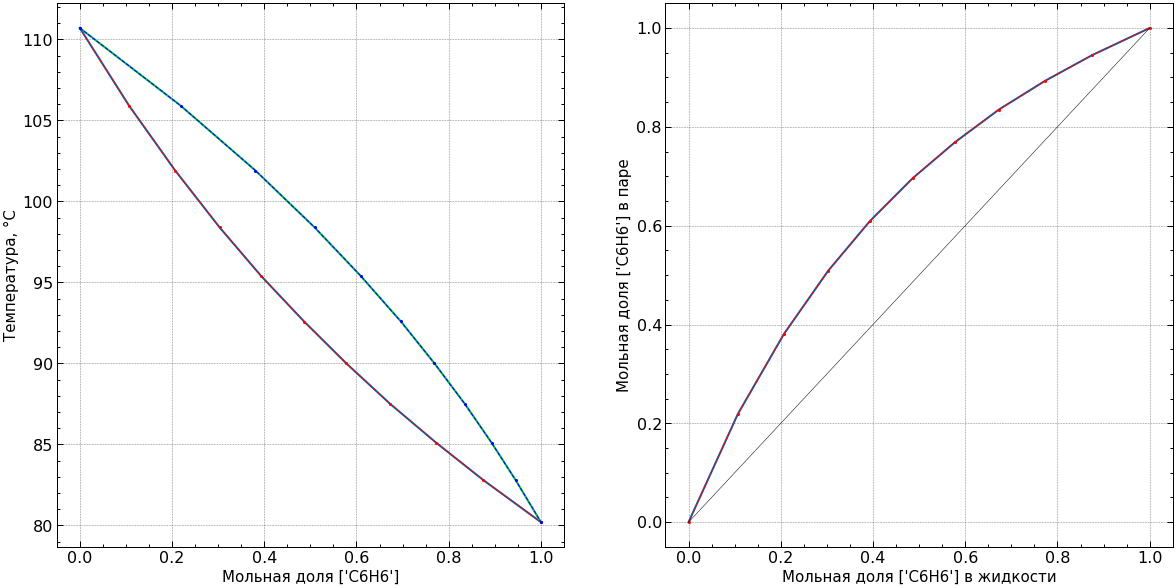

In [7]:
plt.style.use(['science', 'no-latex', 'notebook', 'grid'])


fig = plt.figure(figsize=(20,10))
axes = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)

axes.plot(diagram['x'], diagram['t'])
axes.plot(diagram['y'], diagram['t'])
axes.set_ylabel('Температура, °С', fontsize=15)
axes.set_xlabel(f'Мольная доля {A_name}', fontsize=15)

p_x = dfс.get_fit(diagram['x'], diagram['t'])
p_y = dfс.get_fit(diagram['y'], diagram['t'])
axes.plot(diagram['x'], p_x, 'o--', color='red', lw=1, ms=2)
axes.plot(diagram['y'], p_y, 'o--', color='blue', lw=1, ms=2)

axes2.plot(diagram['x'], diagram['y'])
x_y = dfс.get_fit(diagram['x'], diagram['y'])
axes2.plot(diagram['x'], x_y, 'o--', color='red', lw=1, ms=2)
_ = [0, 1]
axes2.plot(_, _, color='black', lw=0.5)
axes2.set_ylabel(f'Мольная доля {A_name} в паре', fontsize=15)
axes2.set_xlabel(f'Мольная доля {A_name} в жидкости', fontsize=15)

In [8]:
F = np.double(5)                  #Производительность по исходной смеси кг/с
FEED_TEMPERATURE = np.double(20)  #Начальная температура
FEED = np.double(0.35)            #В исходной смеси %масс Ллт 
DISTILLATE = np.double(0.98)      #В дистилляте(ректификате) %масс 
BOTTOM = np.double(0.017)         #В кубовом остатке %масс ллт
PRESSURE = np.double(10**5)       #Давление в колонне в Па. Влияет на коэфф. диффузии пара в колонне

balance = clc.material_balance(F, FEED, DISTILLATE, BOTTOM, xy_diagram, Substance)
balance

Ma                                                [78.114]
Mb                                                [92.141]
массовый расход в питателе                             5.0
массовый расход в кубовом остатке                 3.271028
массовый расход в дефлегматоре                    1.728972
xf                                     [0.388436640491331]
xp                                    [0.9829929003185919]
xw                                   [0.01999167633015832]
yf                                    [0.6040665755664814]
Rmin                                  [1.7572992572670803]
dtype: object

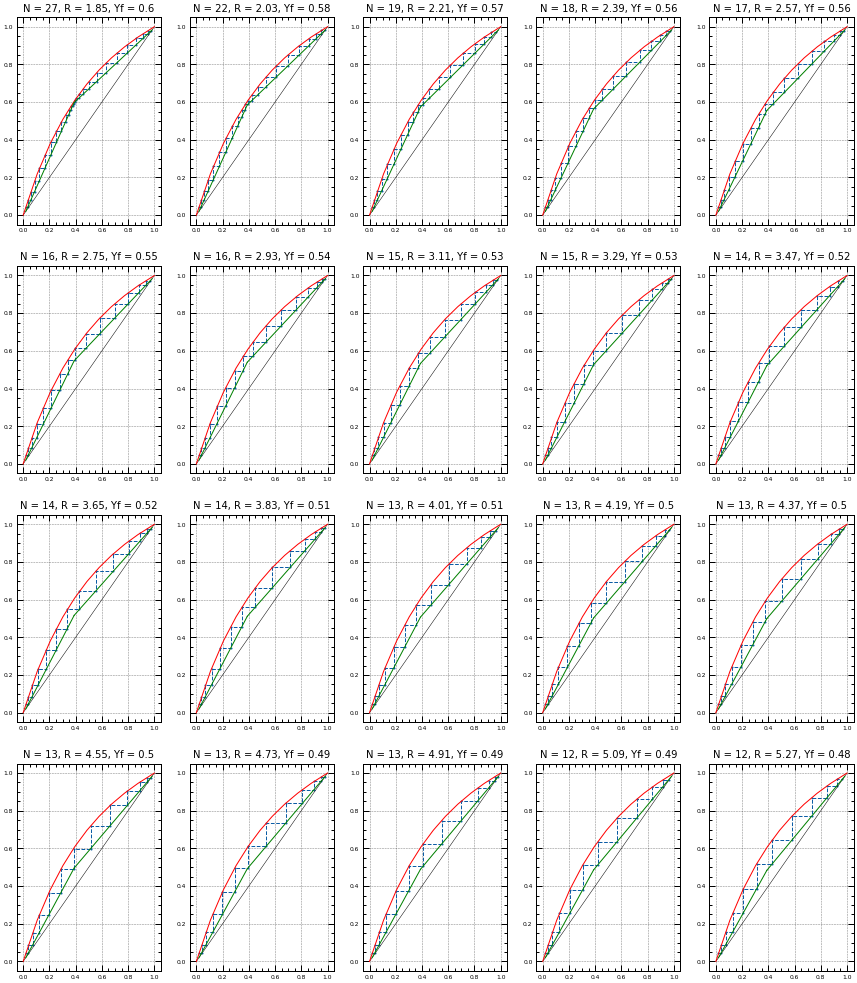

In [9]:
SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

R,Ngraf = clc.get_range_phlegm_number(
    balance['yf'],
    balance['xw'],
    balance['xf'],
    balance['xp'],
    balance['Rmin'],
    xy_diagram,
    diagram,
    Bt_range=20,
    plot_lines='True')



In [10]:
R

array([1.84516422, 2.02551862, 2.20587302, 2.38622741, 2.56658181,
       2.74693621, 2.9272906 , 3.107645  , 3.2879994 , 3.4683538 ,
       3.64870819, 3.82906259, 4.00941699, 4.18977139, 4.37012578,
       4.55048018, 4.73083458, 4.91118898, 5.09154337, 5.27189777])

Оптимальное флегмовое число = [2.39]


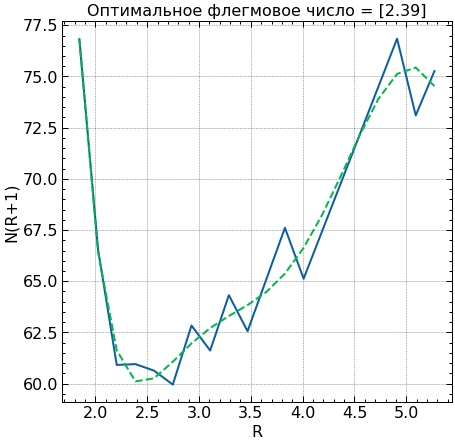

In [11]:
plt.style.use(['science', 'no-latex', 'notebook', 'grid'])
Ropt = clc.get_optimal_phlegm_number(R, Ngraf)

In [12]:
properties = clc.calculate_properties(diagram, balance, Substance)
properties

,температура,содержание легколетучего в жидкости,содержание легколетучего в паре,плотность жидкости,теплопроводность жидкости,теплота парообразования жидкости,удельная теплоемкость жидкости,поверхностное натяжение жидкости,давление насыщенного пара жидкости,коэффициент объемного расширения жидкости,молярный объем газа,молярная масса жидкости,молярная масса газа,плотность пара,вязкость пара,вязкость жидкости,молярный объем жидкости
куба,109.762678,0.019992,0.05,779.837843,0.112000,364.723205,2006.529720,18.488489,761.651184,1.355766,31.401223,91.860577,91.43965,2.911977,0.009151,0.249722,117.794459
низа,101.994479,0.204214,0.38,788.467040,0.115215,370.958523,1978.548527,19.202779,761.206841,1.348172,30.764182,89.276488,86.81074,2.821812,0.009140,0.263988,113.227926
питания,95.563416,0.388437,0.60,795.685722,0.118108,376.740489,1955.998162,19.780756,761.251372,1.346961,30.236795,86.692399,83.72480,2.768971,0.009113,0.277152,108.953066
верха,87.196111,0.685715,0.84,805.368993,0.122387,385.408872,1927.937492,20.528354,761.898617,1.354274,29.550624,82.522479,80.35832,2.719344,0.009063,0.296614,102.465428
дистиллята,80.542778,0.982993,0.99,813.536777,0.126447,393.541689,1907.084242,21.128299,762.373885,1.369285,29.005009,78.352559,78.25427,2.697957,0.009002,0.314584,96.311022


In [13]:
thermal_balance = clc.calculate_thermal_balance(balance, properties, Ropt)
thermal_balance

теплота забираемая водой в дефлегматоре     [2306.6324306259285]
теплота передаваемая паром от испарителя             1883.702444
теплота исходной смеси                                934.609329
теплота кубовой жидкости                              720.418007
теплота дистиллята                                    265.573315
теплота получаемая кипящей жидкостью         [2358.014423399037]
dtype: object

In [14]:
def calculate_diameter(balance, Ropt, properties, plate_type = 'ситчатая'):
    standart_list = np.array([0.4, 0.5, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.2, 2.6, 3.0])
    diameter = pd.Series(dtype = float)
    
    diameter['массовая нагрузка жидкости верха'] = (balance['массовый расход в дефлегматоре'] * Ropt * properties['молярная масса жидкости']['верха'] 
                                                            / properties['молярная масса жидкости']['дистиллята'])

    diameter['массовая нагрузка жидкости низа'] = ((balance['массовый расход в дефлегматоре'] * Ropt * properties['молярная масса жидкости']['низа'] 
                                                            / properties['молярная масса жидкости']['дистиллята'])
                +balance['массовый расход в питателе'] * properties['молярная масса жидкости']['низа'] / properties['молярная масса жидкости']['питания'])
    diameter['массовый поток пара верха'] = (balance['массовый расход в дефлегматоре'] * (Ropt+1) * properties['молярная масса газа']['верха'] 
                                                    / properties['молярная масса газа']['дистиллята'])
            
    diameter['массовый поток пара низа'] = (balance['массовый расход в дефлегматоре'] * (Ropt+1) * properties['молярная масса газа']['низа'] 
                                                    / properties['молярная масса газа']['дистиллята'])
    if plate_type == 'ситчатая':
        diameter['скорость пара верха'] = 0.05*np.sqrt(properties['плотность жидкости']['верха']/properties['плотность пара']['верха'])
        diameter['скорость пара низа'] = 0.05*np.sqrt(properties['плотность жидкости']['низа']/properties['плотность пара']['низа'])
    
    diameter['диаметр верха'] = np.sqrt(4*diameter['массовый поток пара верха']
                                    / (np.pi * diameter['скорость пара верха'] * properties['плотность пара']['верха']))
        
    diameter['диаметр низа'] = np.sqrt(4*diameter['массовый поток пара низа']
                                    / (np.pi * diameter['скорость пара низа'] * properties['плотность пара']['низа']))
    
    diameter['стандартный размер обечайки'] = np.array([standart_list[standart_list > diameter['диаметр низа']].min(),
                                                        standart_list[standart_list > diameter['диаметр верха']].min()]).max()
    
    diameter['действительная рабочая скорость верха'] = diameter['скорость пара верха'] *(diameter['диаметр верха'] 
                                                                                                    /diameter['стандартный размер обечайки'])**2
        
    diameter['действительная рабочая скорость низа'] = diameter['скорость пара низа'] *(diameter['диаметр низа'] 
                                                                                                    /diameter['стандартный размер обечайки'])**2

    return diameter



In [15]:
def get_plate(diameter, plate_type = 'ТС—Р'):
    
    table_plate = pd.read_excel('tables/Техническая характеристика ситчатых тарелок типа ТС.xlsx')
    hole_list=np.array([3,4,5,8])
    
    type_mask = table_plate['Тип тарелки'] == plate_type
    d_mask = table_plate['Диаметр колонны D, мм'] == diameter['стандартный размер обечайки']*1000
    plate = table_plate[type_mask & d_mask]
    
    free_section_list = np.array([float(str(*plate[hole].values)[0:str(*plate[hole].values).find('—')]) for hole in hole_list])
    free_section = free_section_list[free_section_list == free_section_list.max()][-1]
    
    vapor_speed = np.array([diameter['скорость пара верха'], diameter['скорость пара низа']]).max()
    vapor_section_speed = vapor_speed*0.785*diameter['стандартный размер обечайки']**2/plate['Рабочее сечение тарелки, м2'].values
    
    return pd.Series({'скорость пара в рабочем сечении тарелки':vapor_section_speed,
                      'рабочее сечение тарелки':plate['Рабочее сечение тарелки, м2'].values,
                      'тип тарелки':plate_type,
                      'относительное свободное сечение тарелки':free_section,
                      'высота переливного порога':0.03,
                      'ширина переливного порога':plate['Периметр слива Lc, м'].values})



In [16]:
diameter = calculate_diameter(balance, Ropt, properties)
diameter

массовая нагрузка жидкости верха          [4.352160812852881]
массовая нагрузка жидкости низа           [9.857398928289692]
массовый поток пара верха                  [6.01880749515315]
массовый поток пара низа                  [6.502091290258327]
скорость пара верха                                  0.860469
скорость пара низа                                   0.835791
диаметр верха                            [1.8097163435900863]
диаметр низа                             [1.8735646393842804]
стандартный размер обечайки                               2.2
действительная рабочая скорость верха    [0.5822520338794372]
действительная рабочая скорость низа     [0.6061634329159327]
dtype: object

In [17]:
plate = get_plate(diameter)
plate

скорость пара в рабочем сечении тарелки    [0.9399847321378076]
рабочее сечение тарелки                                 [3.478]
тип тарелки                                                ТС—Р
относительное свободное сечение тарелки                    17.9
высота переливного порога                                  0.03
ширина переливного порога                                [1.24]
dtype: object

In [18]:
table_plate = pd.read_excel('tables/Техническая характеристика ситчатых тарелок типа ТС.xlsx')


In [19]:
def get_coeffs(aqua_liquid_saturation, diameter, plate, properties, Substance, PRESSURE):
    bubble_layer = pd.Series(dtype=float)

    def get_water_interfacial_tension(temperature):
    
        aq = aqua_liquid_saturation.loc[aqua_liquid_saturation[aqua_liquid_saturation['temperature'] >= temperature].index.min()]
        return aq['interfacial_tension_kilo']

    bubble_layer['высота светлого слоя жидкости верха'] = (
        0.787 * (diameter['массовая нагрузка жидкости верха']
                /(properties['плотность жидкости']['верха']*plate['ширина переливного порога']))**0.2
        *(plate['высота переливного порога']**0.56)
        *(plate['скорость пара в рабочем сечении тарелки']**(0.05-4.6*plate['высота переливного порога']))
        *(1-0.31*np.exp(-0.11*properties['вязкость жидкости']['верха']))
        *(properties['поверхностное натяжение жидкости']['верха']
            /get_water_interfacial_tension(properties['температура']['верха']))**0.09)
    
    bubble_layer['высота светлого слоя жидкости низа'] = (
        0.787 * (diameter['массовая нагрузка жидкости низа']
                /(properties['плотность жидкости']['низа']*plate['ширина переливного порога']))**0.2
        *(plate['высота переливного порога']**0.56)
        *(plate['скорость пара в рабочем сечении тарелки']**(0.05-4.6*plate['высота переливного порога']))
        *(1-0.31*np.exp(-0.11*properties['вязкость жидкости']['низа']))
        *(properties['поверхностное натяжение жидкости']['низа']
            /get_water_interfacial_tension(properties['температура']['низа']))**0.09)
    
    bubble_layer['коэффициент Фруда верха'] = plate['скорость пара в рабочем сечении тарелки']/(9.8 * bubble_layer['высота светлого слоя жидкости верха'])
    bubble_layer['коэффициент Фруда низа'] = plate['скорость пара в рабочем сечении тарелки']/(9.8 * bubble_layer['высота светлого слоя жидкости низа'])
    
    bubble_layer['паросодержание барботажного слоя верха'] = np.sqrt(bubble_layer['коэффициент Фруда верха'])/(1+np.sqrt(bubble_layer['коэффициент Фруда верха']))
    bubble_layer['паросодержание барботажного слоя низа'] = np.sqrt(bubble_layer['коэффициент Фруда низа'])/(1+np.sqrt(bubble_layer['коэффициент Фруда низа']))
    
    #находим коэффициенты диффузии как для насадочной колонны
    variables = pd.Series(dtype=float)
        
    u_a = clc.get_value(component= Substance['A'], attribute='vicosity_organic_liquid', temperature=20)
    u_b = clc.get_value(component= Substance['B'], attribute='vicosity_organic_liquid', temperature=20)
    variables['вязкость жидкости верха при 20°С'] = (u_a*properties['содержание легколетучего в жидкости']['верха'] 
                                                    + u_b*(1-properties['содержание легколетучего в жидкости']['верха']))
    
    variables['вязкость жидкости низа при 20°С'] = (u_a*properties['содержание легколетучего в жидкости']['низа'] 
                                                    + u_b*(1-properties['содержание легколетучего в жидкости']['низа']))
    
    p_a = clc.get_value(component= Substance['A'], attribute='density_organic_liquid', temperature=20)
    p_b = clc.get_value(component= Substance['B'], attribute='density_organic_liquid', temperature=20)
    variables['плотность жидкости верха при 20°С'] = (p_a*properties['содержание легколетучего в жидкости']['верха'] 
                                                    + p_b*(1-properties['содержание легколетучего в жидкости']['верха']))
    
    variables['плотность жидкости низа при 20°С'] = (p_a*properties['содержание легколетучего в жидкости']['низа'] 
                                                    + p_b*(1-properties['содержание легколетучего в жидкости']['низа']))
    
    bubble_layer['коэффициент диффузии жидкости верха при 20°С'] = np.double([10**(-6)]) / (np.sqrt(variables['вязкость жидкости верха при 20°С'])
        *(properties['молярный объем жидкости']['дистиллята']**(1/3) + properties['молярный объем жидкости']['куба']**(1/3))**2) *np.sqrt(
            1/properties['молярная масса жидкости']['дистиллята'] + 1/properties['молярная масса жидкости']['куба'])
        
    bubble_layer['коэффициент диффузии жидкости низа при 20°С'] = np.double([10**(-6)]) / (np.sqrt(variables['вязкость жидкости низа при 20°С'])
    *(properties['молярный объем жидкости']['дистиллята']**(1/3) + properties['молярный объем жидкости']['куба']**(1/3))**2) *np.sqrt(
        1/properties['молярная масса жидкости']['дистиллята'] + 1/properties['молярная масса жидкости']['куба'])
    
    bubble_layer['температурный коэффициент верха'] = (0.2 * np.sqrt(variables['вязкость жидкости верха при 20°С'])
                                                / variables['плотность жидкости верха при 20°С']**(1/3))
    
    bubble_layer['температурный коэффициент низа'] = (0.2 * np.sqrt(variables['вязкость жидкости низа при 20°С'])
                                                / variables['плотность жидкости низа при 20°С']**(1/3))
    
    bubble_layer['коэффициент диффузии жидкости низа'] = (bubble_layer['коэффициент диффузии жидкости низа при 20°С'] 
                        *(1 + bubble_layer['температурный коэффициент низа']*(properties['температура']['низа'] - 20)))
                                                                                                            
    bubble_layer['коэффициент диффузии жидкости верха'] = (bubble_layer['коэффициент диффузии жидкости верха при 20°С'] 
                        *(1 + bubble_layer['температурный коэффициент верха']*(properties['температура']['верха'] - 20)))
    
        
    bubble_layer['коэффициент диффузии пара верха'] = (np.double(4.22*10**(-2)) * (np.double(273) + properties['температура']['верха'])**(3/2)
        /(PRESSURE * (properties['молярный объем жидкости']['дистиллята']**(1/3) + properties['молярный объем жидкости']['куба']**(1/3))**2)*np.sqrt(
            1/properties['молярная масса жидкости']['дистиллята'] + 1/properties['молярная масса жидкости']['куба']))
    
    bubble_layer['коэффициент диффузии пара низа'] = (np.double(4.22*10**(-2)) * (np.double(273) + properties['температура']['низа'])**(3/2)
        /(PRESSURE * (properties['молярный объем жидкости']['дистиллята']**(1/3) + properties['молярный объем жидкости']['куба']**(1/3))**2)*np.sqrt(
            1/properties['молярная масса жидкости']['дистиллята'] + 1/properties['молярная масса жидкости']['куба']))
    
    #находим коэффициенты массоотдачи
    bubble_layer['коэффициент массоотдачи жидкости верха'] = (
        6.24*10**5 * bubble_layer['коэффициент диффузии жидкости верха']**0.5
        *(diameter['массовая нагрузка жидкости верха']
        /(properties['плотность жидкости']['верха']*plate['рабочее сечение тарелки']
            *(1-bubble_layer['паросодержание барботажного слоя верха'])))**0.5
        *bubble_layer['высота светлого слоя жидкости верха']
        *(properties['вязкость пара']['верха']
        /(properties['вязкость жидкости']['верха'] + properties['вязкость пара']['верха']))**0.5
        )
    
    bubble_layer['коэффициент массоотдачи жидкости низа'] = (
        6.24*10**5 * bubble_layer['коэффициент диффузии жидкости низа']**0.5
        *(diameter['массовая нагрузка жидкости низа']
        /(properties['плотность жидкости']['низа']*plate['рабочее сечение тарелки']
            *(1-bubble_layer['паросодержание барботажного слоя низа'])))**0.5
        *bubble_layer['высота светлого слоя жидкости низа']
        *(properties['вязкость пара']['низа']
        /(properties['вязкость жидкости']['низа'] + properties['вязкость пара']['низа']))**0.5
        )
        
    bubble_layer['коэффициент массоотдачи пара верха'] = (
        6.24*10**5 * bubble_layer['коэффициент диффузии пара верха']**0.5
        *plate['относительное свободное сечение тарелки']/100
        *(plate['скорость пара в рабочем сечении тарелки']/bubble_layer['паросодержание барботажного слоя верха'])**0.5
        *bubble_layer['высота светлого слоя жидкости верха']
        *(properties['вязкость пара']['верха']
          /(properties['вязкость жидкости']['верха'] + properties['вязкость пара']['верха']))**0.5)
    
    bubble_layer['коэффициент массоотдачи пара низа'] = (
        6.24*10**5 * bubble_layer['коэффициент диффузии пара низа']**0.5
        *plate['относительное свободное сечение тарелки']/100
        *(plate['скорость пара в рабочем сечении тарелки']/bubble_layer['паросодержание барботажного слоя низа'])**0.5
        *bubble_layer['высота светлого слоя жидкости низа']
        *(properties['вязкость пара']['низа']
          /(properties['вязкость жидкости']['низа'] + properties['вязкость пара']['низа']))**0.5)
    
    bubble_layer['коэффициент массоотдачи жидкости верха на кмоль'] = (
        bubble_layer['коэффициент массоотдачи жидкости верха'] * properties['плотность жидкости']['верха']/properties['молярная масса жидкости']['верха'])
    
    bubble_layer['коэффициент массоотдачи жидкости низа на кмоль'] = (
        bubble_layer['коэффициент массоотдачи жидкости низа'] * properties['плотность жидкости']['низа']/properties['молярная масса жидкости']['низа'])
    
    bubble_layer['коэффициент массоотдачи пара верха на кмоль'] = (
        bubble_layer['коэффициент массоотдачи пара верха'] * properties['плотность пара']['верха']/properties['молярная масса газа']['верха'])
    
    bubble_layer['коэффициент массоотдачи пара низа на кмоль'] = (
        bubble_layer['коэффициент массоотдачи пара низа'] * properties['плотность пара']['низа']/properties['молярная масса газа']['низа'])
    
    return bubble_layer

features = get_coeffs(aqua_liquid_saturation, diameter, plate, properties, Substance, PRESSURE)
features


высота светлого слоя жидкости верха                  [0.023755498309723556]
высота светлого слоя жидкости низа                   [0.028020256348883065]
коэффициент Фруда верха                                 [4.037667749640789]
коэффициент Фруда низа                                  [3.423123907488466]
паросодержание барботажного слоя верха                 [0.6677072824613884]
паросодержание барботажного слоя низа                  [0.6491435649105651]
коэффициент диффузии жидкости верха при 20°С        [2.157152455916271e-09]
коэффициент диффузии жидкости низа при 20°С        [2.2119815939664596e-09]
температурный коэффициент верха                                    0.016566
температурный коэффициент низа                                     0.016191
коэффициент диффузии жидкости низа                  [5.148560352666184e-09]
коэффициент диффузии жидкости верха                 [4.558360621092526e-09]
коэффициент диффузии пара верха                                    0.000005
коэффициент 

In [114]:
def calculate_kinetic_slice(x, xy_diagram, features, balance, properties, plate, Ropt, diameter):
    
    #найдем производную функции как тангенс угла наклона касательной к функции
    def tg(x, dx=0.01):
        nonlocal xy_diagram
        return (np.polyval(xy_diagram, (x + dx)) - np.polyval(xy_diagram, x))/dx
    
    def mass_transfer_factor():
        nonlocal Ropt
        nonlocal values
        return values['производная функции равновестной кривой'] * (Ropt + 1)/Ropt
    
    #подробно в источнике [8] стр 202
    def bypass_fraction(loc = 'низа'):
        nonlocal properties
        nonlocal plate 
        Fs = plate['скорость пара в рабочем сечении тарелки'] * properties['плотность пара'][loc]**0.5
        O = dfс.get_coeffs([1, 1.5, 2, 2.5, 3],[0.1, 0.1, 0.1, 0.15, 0.2])
        return np.polyval(O, Fs)
    
    #подробно в [1] стр 241-242
    def mixing_cells():
        nonlocal diameter
        Lt = np.sqrt(diameter['стандартный размер обечайки']**2 - 1.05**2)
        return Lt/0.35
    
    #подробно в [8] стр 194-195
    def liquid_entrainment(loc = 'верха'):
        nonlocal properties
        nonlocal diameter
        nonlocal features
        nonlocal plate
        e = dfс.get_coeffs([0.7, 0.8, 1.5, 2, 3, 4, 6, 10],[1e-3, 1e-2, 0.8e-1, 0.9e-1, 1.2e-1, 1.3e-1, 1.4e-1, 1.5e-1])
        
        if loc == 'верха' or loc != 'низа':
            m = (1.15/1000*
                ((properties['поверхностное натяжение жидкости']['верха']/1000)/properties['плотность пара']['верха'])**0.295 
                *((properties['плотность жидкости']['верха'] - properties['плотность пара']['верха'])/(properties['вязкость пара']['верха']/1000))**0.425)

            if diameter['стандартный размер обечайки'] < 1.2:
                H = 0.3
            else:
                H = 0.5

            hp =  features['высота светлого слоя жидкости верха'] / (1 - features['паросодержание барботажного слоя верха'])
            Hc = H - hp
            return np.polyval(e, plate['скорость пара в рабочем сечении тарелки']/m/Hc)
            
        if loc == 'низа':
            m = (1.15/1000*
                ((properties['поверхностное натяжение жидкости']['низа']/1000)/properties['плотность пара']['низа'])**0.295 
                *((properties['плотность жидкости']['низа'] - properties['плотность пара']['низа'])/(properties['вязкость пара']['низа']/1000))**0.425)

            if diameter['стандартный размер обечайки'] < 1.2:
                H = 0.3
            else:
                H = 0.5

            hp =  features['высота светлого слоя жидкости низа'] / (1 - features['паросодержание барботажного слоя низа'])
            Hc = H - hp
            return np.polyval(e, plate['скорость пара в рабочем сечении тарелки']/m/Hc)
        
    def get_kinetic_y(x, Emy, loc = 'низа'):
        nonlocal Ropt
        nonlocal balance
        nonlocal xy_diagram
        yf = Ropt/(Ropt+1)*balance['xf']+balance['xp']/(Ropt+1)
        _x = float(balance['xw']), float(balance['xf'])
        x_ = float(balance['xf']), float(balance['xp'])
        _y = float(balance['xw']), float(yf)
        y_ = float(yf), float(balance['xp'])
        
        RW_function = np.polyfit(_x,_y, 1)
        RP_function = np.polyfit(x_,y_, 1)
        
        if loc == 'низа' or loc != 'верха':
            return np.polyval(RW_function, x) + Emy*(np.polyval(xy_diagram, x) - np.polyval(RW_function, x))
        else:
            return np.polyval(RP_function, x) + Emy*(np.polyval(xy_diagram, x) - np.polyval(RP_function, x))
    
    
    values = pd.DataFrame(dtype=float)
    
    if x < balance['xf']:
        values['коэффициент массопередачи'] = (
            1/((1/features['коэффициент массоотдачи пара низа на кмоль']) + tg(x)/features['коэффициент массоотдачи жидкости низа на кмоль']))        
        values['производная функции равновестной кривой'] = tg(x)        
        values['общее число единиц переноса'] = (
            values['коэффициент массопередачи'] * properties['молярная масса газа']['низа']
            /(plate['скорость пара в рабочем сечении тарелки'] * properties['плотность пара']['низа']))
        values['локальная эффективность по пару'] = 1 - np.exp(-values['общее число единиц переноса'])
        values['B'] = (mass_transfer_factor()*(values['локальная эффективность по пару'] + liquid_entrainment(loc='низа')/tg(x))
                       /(1-bypass_fraction(loc='низа'))
                       /(1 + liquid_entrainment(loc='низа')/tg(x)*mass_transfer_factor()))
        values["Мёрфи 2"] = (values['локальная эффективность по пару']/values['B']
                             *((1 + values['B']/mixing_cells())**mixing_cells() - 1))
        values["Мёрфи 1"] = (values["Мёрфи 2"]
                             /(1 + mass_transfer_factor()*bypass_fraction(loc='низа')*values["Мёрфи 2"]/(1-bypass_fraction(loc='низа'))))
        values['эффективность по Мёрфи'] = (values["Мёрфи 1"]
                           /(1 + liquid_entrainment(loc='низа')*mass_transfer_factor()*values["Мёрфи 1"]/(tg(x) * (1-bypass_fraction(loc='низа')))))
        values['значение кинетической кривой'] = get_kinetic_y(x, values['эффективность по Мёрфи'], loc='низа')
    else:        
        values['коэффициент массопередачи'] = (
            1/((1/features['коэффициент массоотдачи пара верха на кмоль']) + tg(x)/features['коэффициент массоотдачи жидкости верха на кмоль']))
        values['производная функции равновестной кривой'] = tg(x)
        values['общее число единиц переноса'] = (
            values['коэффициент массопередачи'] * properties['молярная масса газа']['верха']
            /(plate['скорость пара в рабочем сечении тарелки'] * properties['плотность пара']['верха']))
        values['локальная эффективность по пару'] = 1 - np.exp(-values['общее число единиц переноса'])
        values['B'] = (mass_transfer_factor()*(values['локальная эффективность по пару'] + liquid_entrainment(loc='верха')/tg(x))
                       /(1-bypass_fraction(loc='верха'))
                       /(1 + liquid_entrainment(loc='верха')/tg(x)*mass_transfer_factor()))
        values["Мёрфи 2"] = (values['локальная эффективность по пару']/values['B']
                             *((1 + values['B']/mixing_cells())**mixing_cells() - 1))
        values["Мёрфи 1"] = (values['Мёрфи 2']
                             /(1 + mass_transfer_factor()*bypass_fraction(loc='верха')*values["Мёрфи 2"]/(1 - bypass_fraction(loc='верха'))))
        values['эффективность по Мёрфи'] = (values["Мёрфи 1"]
                           /(1 + liquid_entrainment(loc='верха')*mass_transfer_factor()*values["Мёрфи 1"]/(tg(x) * (1-bypass_fraction(loc='верха')))))
        values['значение кинетической кривой'] = get_kinetic_y(x, values['эффективность по Мёрфи'], loc='верха')
    
    
        
    return values

calculate_kinetic_slice(0.6, xy_diagram, features, balance, properties, plate, Ropt, diameter)

kinetic_frame = pd.DataFrame(dtype=float)
kinetic_list = np.linspace(balance['xw'], balance['xp'], 20)
for x in kinetic_list:
    kinetic_slice = calculate_kinetic_slice(x, xy_diagram, features, balance, properties, plate, Ropt, diameter)
    kinetic_frame = pd.concat([kinetic_frame, kinetic_slice])

kinetic_frame.index = list(*kinetic_list.T)
kinetic_frame











,коэффициент массопередачи,производная функции равновестной кривой,общее число единиц переноса,локальная эффективность по пару,B,Мёрфи 2,Мёрфи 1,эффективность по Мёрфи,значение кинетической кривой
0.019992,0.033198,2.176813,1.086516,0.662610,2.087312,1.547369,1.020460,0.845116,0.041224
0.070676,0.034533,1.937841,1.130221,0.677038,1.914156,1.476058,1.026126,0.848998,0.142037
0.121360,0.035772,1.732058,1.170774,0.689873,1.758655,1.413494,1.027770,0.850124,0.233145
0.172045,0.036917,1.554302,1.208221,0.701272,1.619329,1.358714,1.026425,0.849203,0.315749
0.222729,0.037970,1.400135,1.242695,0.711395,1.494575,1.310742,1.022956,0.846828,0.390990
0.273413,0.038938,1.265782,1.274382,0.720396,1.382776,1.268653,1.018046,0.843460,0.459904
0.324097,0.039828,1.148069,1.303504,0.728422,1.282396,1.231611,1.012211,0.839450,0.523395
0.374782,0.040646,1.044367,1.330285,0.735598,1.192032,1.198885,1.005830,0.835057,0.582235
0.425466,0.030457,0.952530,0.957480,0.616141,0.951601,0.910369,0.802637,0.691955,0.625180
0.476150,0.031130,0.870833,0.978655,0.624184,0.893812,0.900707,0.803193,0.692368,0.668443


In [113]:
calculate_kinetic_slice(0.6, xy_diagram, features, balance, properties, plate, Ropt, diameter)

,коэффициент массопередачи,производная функции равновестной кривой,общее число единиц переноса,локальная эффективность по пару,B,Мёрфи 2,Мёрфи 1,эффективность по Мёрфи,значение кинетической кривой
0,0.032584,0.70605,1.024347,0.640969,0.772452,0.880075,0.802857,0.692118,0.650251


Text(0.5, 0, "Мольная доля ['C6H6'] в жидкости")

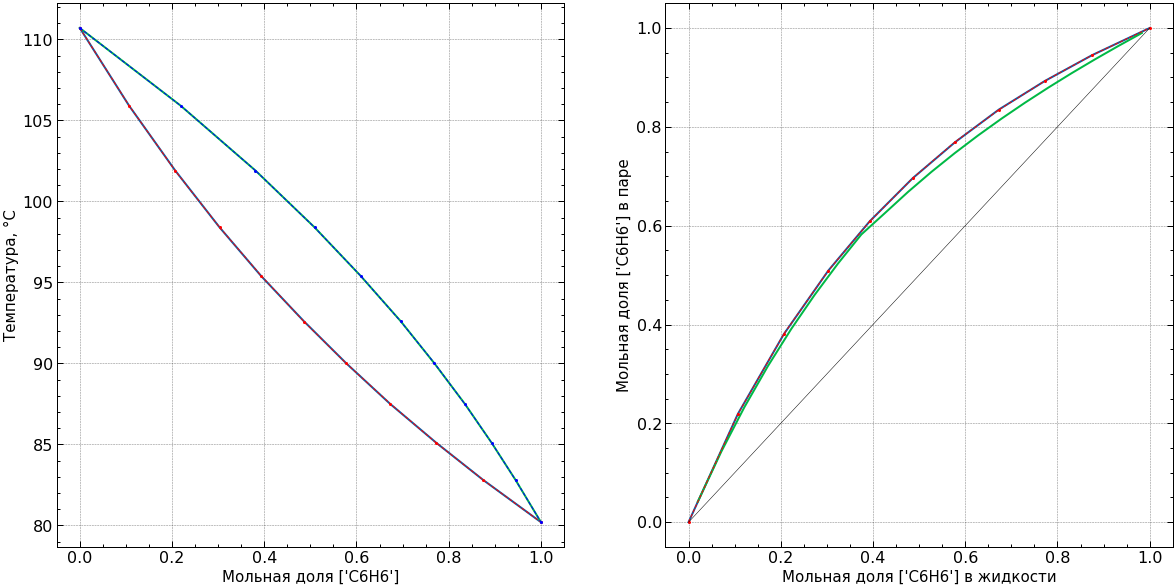

In [115]:
plt.style.use(['science', 'no-latex', 'notebook', 'grid'])


fig = plt.figure(figsize=(20,10))
axes = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)

axes.plot(diagram['x'], diagram['t'])
axes.plot(diagram['y'], diagram['t'])
axes.set_ylabel('Температура, °С', fontsize=15)
axes.set_xlabel(f'Мольная доля {A_name}', fontsize=15)

p_x = dfс.get_fit(diagram['x'], diagram['t'])
p_y = dfс.get_fit(diagram['y'], diagram['t'])
axes.plot(diagram['x'], p_x, 'o--', color='red', lw=1, ms=2)
axes.plot(diagram['y'], p_y, 'o--', color='blue', lw=1, ms=2)

axes2.plot(diagram['x'], diagram['y'])
axes2.plot(kinetic_frame['значение кинетической кривой'].index, kinetic_frame['значение кинетической кривой'].values)
x_y = dfс.get_fit(diagram['x'], diagram['y'])
axes2.plot(diagram['x'], x_y, 'o--', color='red', lw=1, ms=2)
_ = [0, 1]
axes2.plot(_, _, color='black', lw=0.5)
axes2.set_ylabel(f'Мольная доля {A_name} в паре', fontsize=15)
axes2.set_xlabel(f'Мольная доля {A_name} в жидкости', fontsize=15)